<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/main/PytorchStepbystep/C_02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 2.1

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter2_1()
# This is needed to render the plots in this chapter
from plots.chapter2_1 import *

Finished!


In [2]:
import numpy as np
import datetime

import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Going Classy

## The Class

Summary by christina:

building a class from the **constructor**


That would be the **constructor**, the `__init__(self)` method that we've already seen a couple of times when handling both model and dataset classes.

The constructor defines the parts that make up the class. These parts are the attributes of the class. Typical attributes include:
- **arguments** provided by the user
- **placeholders** for other objects that are not available at the moment of creation (pretty much like delayed arguments)
- **variables** we may want to keep track of
- **functions** that are dynamically built using some of the arguments and higherorder functions

Let's see how each one of those applies to our problem.

In [ ]:
# A completely empty (and useless) class
class StepByStep(object):
    pass

## The Constructor


#### **Arguments**
Let's start with the arguments, the part that needs to be specified by the user. At the beginning of Chapter 2 , we asked ourselves: "Would the code inside the training loop change if we were using a different **optimizer,** or **loss**, or even **model**?". The answer was and still is, no, it wouldn't change.

So, these three elements, optimizer, loss, and model, will be our main arguments. The user needs to specify those; we can't figure them on our own.

But there is one more piece of information needed: the device to be used for training the model. Instead of asking the user to inform it, we'll automatically check if there is a GPU available and fall back to a CPU if there isn't. But we still want to give the user a chance to use a different device (whatever the reason may be); thus, we add a very simple method (conveniently named to) that allows the user to specify a device.

Our constructor `(__init__)` method will initially look like this:

### Arguments

In [ ]:
#auhor: Christina

class StepByStep(object):
  def __init__(self, model, loss_fn, optimizer):
    self.model = model
    self.loss_fn = loss_fn
    self.optimizer = optimizer
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    self.model.to(self.device)

  def to(self, device):
    try:

      self.device = device
      self.model.to(self.device)
    except RuntimeError:
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
        self.model.to(self.device)

In [ ]:
class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class
        
        # We start by storing the arguments as attributes 
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)
        
    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

### Placeholders


Next, let's tackle the placeholders or delayed arguments. We expect the user to eventually provide some of those, as they are not necessarily required. There are another three elements that fall into that category: train and validation data loaders and a summary writer to interface with TensorBoard.

We need to append the following code to the constructor method above (I am not reproducing the rest of the method here for the sake of simplicity - in the Jupyter notebook you'll find the full code):

In [ ]:
# These attributes are defined here, but since they are
# not available at the moment of creation, we keep them None
class Something(StepByStep):
  def __init__():
    self.train_loader = None
    self.test_loader = None
    self.writer = None
    pass


The validation data loader is not required

The train data loader is obviously required. How could we possibly train a model
without it?


Conceptually speaking, the data loader (and the dataset it contains) is not part of the model. It is the input we use to train the model. **Since we can specify a model without it, it shouldn't be made an argument of our class.**

In other words, our StepByStep class is defined by a **particular combination of arguments (model, loss function, and optimizer)**, which can then be used to perform model training on any (compatible) dataset.

The validation data loader is not required (although it is recommended), and the summary writer is definitely optional.

The class should implement methods to allow the user to inform those at a later time (both methods should be placed inside the StepByStep class, after the constructor method):

In [ ]:
#Christina

class StepByStep(object):
  def __init__(self, model, loss_fn, optimizer):
    self.model = model
    self.loss_fn = loss_fn
    self.optimizer = optimizer
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    self.model.to(self.device)

    self.train_loader = None 
    self.val_loader = None
    self.writer = None

  def to(self, device):
    
    try:
        self.device = device
        self.model.to(self.device)
    except RuntimeError:
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
        self.model.to(self.device)
  def set_loaders(train_loader,val_loader=None): #Here, None means optinally
    self.train_loader = train_loader
    self.val_loader = val_loader
  def set_tensorboard(self,name,folder='runs'):
    suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
    self.writter = SummaryWriter(f'{folder}/{name}_{suffix}')

In [ ]:


class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class
        
        # We start by storing the arguments as attributes 
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)
        
        # These attributes are defined here, but since they are
        # not available at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None
        self.writer = None

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader 
        # (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def set_tensorboard(self, name, folder='runs'):
        # This method allows the user to create a SummaryWriter to 
        # interface with TensorBoard
        suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
        self.writer = SummaryWriter(f'{folder}/{name}_{suffix}')

### Variables


Then, there are variables we may want to keep track of. Typical examples are **the number of epochs**, and the **training and validation losses**. These variables are likely to be computed and updated internally by the class.

We need to append the following code to the constructor method once again (like we did with the placeholders):

In [ ]:
class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class
        
        # We start by storing the arguments as attributes 
        # to use them later
        #1. 
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)
        
        # These attributes are defined here, but since they are
        # not available at the moment of creation, we keep them None

        self.train_loader = None
        self.val_loader = None
        self.writer = None

        # These attributes are going to be computed internally
        #3. 
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader 
        # (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def set_tensorboard(self, name, folder='runs'):
        # This method allows the user to create a SummaryWriter to 
        # interface with TensorBoard
        suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
        self.writer = SummaryWriter(f'{folder}/{name}_{suffix}')

### Functions

In [ ]:
class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class
        
        # We start by storing the arguments as attributes 
        # to use them later
        #1.
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)
        
        # These attributes are defined here, but since they are
        # not available at the moment of creation, we keep them None
        #2.
        self.train_loader = None
        self.val_loader = None
        self.writer = None

        # These attributes are going to be computed internally
        #3.
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model, 
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        #4.
        self.train_step = self._make_train_step()
        # Creates the val_step function for our model and loss
        self.val_step = self._make_val_step()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader 
        # (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def set_tensorboard(self, name, folder='runs'):
        # This method allows the user to create a SummaryWriter to 
        # interface with TensorBoard
        suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
        self.writer = SummaryWriter(f'{folder}/{name}_{suffix}')

### Step Methods

In [ ]:
#Christina

def _make_train_fn(self):

  def perform_train_step_fn(x,y):
    self.model.train()

    yhat = self.model(x)
    loss = self.loss_fn(yhat,y)
    loss.backward()
    self.optimizer.step()
    self.optimizer.zero_grad()

    return loss.item()

  return perform_train_step_fn

def _make_val_step_fn(self):
  def perform_val_step_fn(x,y):
    self.model.eval()

    yhat = self.model(x)
    loss = self.loss_fn(yhat,y)
    return loss.item()

  return perform_val_step_fn

In [ ]:
def _make_train_step_fn(self):
    # This method does not need ARGS... it can refer to
    # the attributes: self.model, self.loss_fn and self.optimizer

    # Builds function that performs a step in the train loop
    def perform_train_step_fn(x, y):
        # Sets model to TRAIN mode
        self.model.train()

        # Step 1 - Computes our model's predicted output - forward pass
        yhat = self.model(x)
        # Step 2 - Computes the loss
        loss = self.loss_fn(yhat, y)
        # Step 3 - Computes gradients for both "b" and "w" parameters
        loss.backward()
        # Step 4 - Updates parameters using gradients and the
        # learning rate
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    # Returns the function that will be called inside the train loop
    return perform_train_step_fn

def _make_val_step_fn(self):
    # Builds function that performs a step in the validation loop
    def perform_val_step_fn(x, y):
        # Sets model to EVAL mode
        self.model.eval()

        # Step 1 - Computes our model's predicted output - forward pass
        yhat = self.model(x)
        # Step 2 - Computes the loss
        loss = self.loss_fn(yhat, y)
        # There is no need to compute Steps 3 and 4, 
        # since we don't update parameters during evaluation
        return loss.item()

    return perform_val_step_fn

Why these methods have an underscore as a prefix? How is this `__init__` method?


Methods, _methods and __methods
Some programming languages, like Java, have three kinds of methods: public,
protected, and private. Public methods are the kind you’re most familiar
with: they can be called by the user.
Protected methods, on the other hand, shouldn’t be called by the user - they
are supposed to be called either internally or by the child class (the child
class can call a protected method from its parent class).
Finally, private methods are supposed to be called exclusively internally.
They should be invisible even to a child class.
These rules are strictly enforced in Java, but Python takes a more relaxed
approach: all methods are public, meaning you can call whatever method
you want. But you can suggest the appropriate usage by prefixing the
method name with a single underscore (for protected methods) or a double
underscore (for private methods). This way, the user is aware of the
programmer’s intention."



In our example, both _make_train_step and _make_val_step are defined as
protected methods. I expect users not to call them directly, but if someone
decides to define a class that inherits from StepByStep, they should feel entitled to
do so.

In [ ]:
# ATTENTION! Using SETATTR for educational purposes only :-)
setattr(StepByStep, '_make_train_step_fn', _make_train_step_fn)
setattr(StepByStep, '_make_val_step_fn', _make_val_step_fn)

### setattr


**The setattr function sets the value of the specified attribute of a given object. **But methods are also attributes, so we can use this function to "attach" a method to an existing class and to all its existing instances in one go!

Yes, this is a hack! No, you should not use it in your regular code! Using setattr to build a class by appending methods to it incrementally serves educational purposes only.

To illustrate how it works and why it may be dangerous, I will show you a little example. Let's create a simple Dog class, which takes only the dog's name as argument:

In [ ]:
class Dog(object):
    def __init__(self, name):
        self.name = name

In [ ]:
rex = Dog('Rex')
print(rex.name)

Rex


In [ ]:
def bark(dog):
    print('{} barks: "Woof!"'.format(dog.name))

In [ ]:
bark(rex)

Rex barks: "Woof!"


In [ ]:
def bark(self):
    print('{} barks: "Woof!"'.format(self.name))

setattr(Dog, 'bark', bark)

In [ ]:
fido = Dog('Fido')
fido.bark()

Fido barks: "Woof!"


In [ ]:
rex.bark()

Rex barks: "Woof!"


## Training Methods

### Mini-Batch

In [ ]:
# Christina
def _mini_batch(self, validation=False):
  if validation:
    data_loader = self.val_loader
    step_fn = self.val_step_fn

  else:
    data_loader = self.train_loader
    step_fn = self.train_step_fn

  mini_batch_losses = []
  for x_batch, y_batch in data_loader:
    x_batch = x_batch.to(self.device)
    y_batch = y_batch.to(self.device)

    mini_batch_loss = step_fn(x_batch,y_batch)
    mini_batch_losses.append(mini_batch_loss)

  loss = np.mean(mini_batch_losses)

  return loss

setattr(StepByStep,'_mini_batch',_mini_batch)

In [ ]:
def _mini_batch(self, validation=False):
    # The mini-batch can be used with both loaders
    # The argument `validation`defines which loader and 
    # corresponding step function is going to be used
    if validation:
        data_loader = self.val_loader
        step_fn = self.val_step_fn
    else:
        data_loader = self.train_loader
        step_fn = self.train_step_fn

    if data_loader is None:
        return None

    # Once the data loader and step function, this is the same
    # mini-batch loop we had before
    mini_batch_losses = []
    for x_batch, y_batch in data_loader:
        x_batch = x_batch.to(self.device)
        y_batch = y_batch.to(self.device)

        mini_batch_loss = step_fn(x_batch, y_batch)
        mini_batch_losses.append(mini_batch_loss)

    loss = np.mean(mini_batch_losses)

    return loss

setattr(StepByStep, '_mini_batch', _mini_batch)

### Training Loop

In [ ]:
def set_seed(self, seed=42):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False    
    torch.manual_seed(seed)
    np.random.seed(seed)
    
setattr(StepByStep, 'set_seed', set_seed)

It is also time to use the variables we defined as attributes in the constructor
method: self.total_epochs, self.losses and self.val_losses. All of them are
being updated inside the training loop

In [ ]:
from sys import settrace
#Christina

def train(self, n_epochs, seed=42):
  self.set_seed(seed)

  for epoch in range(n_epochs):
    self.total_epochs += 1

    loss = self._mini_batch(validation=False)
    self.losses.append(loss) #in class StepbyStep: self.losses = []

    with torch.no_grad():
      val_loss = self._mini_batch(validation=True)
      self.val_losses.append(val_loss)

    if self.writer: #Remember? class StepbyStep: self.writer = None
      scalers = {'training': loss}
      if val_loss is not None:
        scalers.update({'validation':val_loss})
        self.writer.add_scalars(main_tag='loss',
                                tag_scalar_dict = scalars,
                                global_step = epoch)
  if self.writer:
    self.writer.Flush()
setattr(StepByStep, 'train', train)

In [ ]:
def train(self, n_epochs, seed=42):
    # To ensure reproducibility of the training process
    self.set_seed(seed)
    
    for epoch in range(n_epochs):
        # Keeps track of the numbers of epochs
        # by updating the corresponding attribute
        self.total_epochs += 1

        # inner loop
        # Performs training using mini-batches
        loss = self._mini_batch(validation=False)
        self.losses.append(loss)

        # VALIDATION
        # no gradients in validation!
        with torch.no_grad():
            # Performs evaluation using mini-batches
            val_loss = self._mini_batch(validation=True)
            self.val_losses.append(val_loss)

        # If a SummaryWriter has been set...
        if self.writer:
            scalars = {'training': loss}
            if val_loss is not None:
                scalars.update({'validation': val_loss})
            # Records both losses for each epoch under the main tag "loss"
            self.writer.add_scalars(main_tag='loss',
                                    tag_scalar_dict=scalars,
                                    global_step=epoch)

    if self.writer:
        # Flushes the writer
        self.writer.flush()
        
setattr(StepByStep, 'train', train)

## Saving and Loading Methods

### Saving

In [ ]:
def save_checkpoint(self, filename):
    # Builds dictionary with all elements for resuming training
    checkpoint = {'epoch': self.total_epochs,
                  'model_state_dict': self.model.state_dict(),
                  'optimizer_state_dict': self.optimizer.state_dict(),
                  'loss': self.losses,
                  'val_loss': self.val_losses}

    torch.save(checkpoint, filename)
    
setattr(StepByStep, 'save_checkpoint', save_checkpoint)

### Loading

In [ ]:
def load_checkpoint(self, filename):
    # Loads dictionary
    checkpoint = torch.load(filename)

    # Restore state for model and optimizer
    self.model.load_state_dict(checkpoint['model_state_dict'])
    self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    self.total_epochs = checkpoint['epoch']
    self.losses = checkpoint['loss']
    self.val_losses = checkpoint['val_loss']

    self.model.train() # always use TRAIN for resuming training   
    
setattr(StepByStep, 'load_checkpoint', load_checkpoint)

Notice that the** model is set to training mode after loading the checkpoint.**
What about making predictions? To make it easier for the user to make predictions for any new data points, we will be handling all the Numpy to PyTorch back and forth conversion inside the function.

### Making Predictions

In [ ]:
#Christina

def predict(self, x):
  self.model.eval()
  x_tensor = torch.as_tensor(x).float()
  y_hat_tensor = self.model(x_tensor.to(self.device))
  self.model.train()
  return y_hat_tensor.detach().cpu().numpy()

setattr(StepByStep, 'predict', predict)

In [ ]:
def predict(self, x):
    # Set is to evaluation mode for predictions
    self.model.eval() 
    # Takes aNumpy input and make it a float tensor
    x_tensor = torch.as_tensor(x).float()
    # Send input to device and uses model for prediction
    y_hat_tensor = self.model(x_tensor.to(self.device))
    # Set it back to train mode
    self.model.train()
    # Detaches it, brings it to CPU and back to Numpy
    return y_hat_tensor.detach().cpu().numpy()

setattr(StepByStep, 'predict', predict)

## Visualization Methods

### Losses

In [ ]:
def plot_losses(self):
    fig = plt.figure(figsize=(10, 4))
    plt.plot(self.losses, label='Training Loss', c='b')
    if self.val_loader:
        plt.plot(self.val_losses, label='Validation Loss', c='r')
    plt.yscale('log')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    return fig

setattr(StepByStep, 'plot_losses', plot_losses)

### Model Graph

In [ ]:
def add_graph(self):
    if self.train_loader and self.writer:
        # Fetches a single mini-batch so we can use add_graph
        x_sample, y_sample = next(iter(self.train_loader))
        self.writer.add_graph(self.model, x_sample.to(self.device))
    
setattr(StepByStep, 'add_graph', add_graph)

## The Full Code

In [18]:
# %load stepbystep/v0.py

import numpy as np
import datetime
import torch
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

plt.style.use('fivethirtyeight')

class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class
        
        # We start by storing the arguments as attributes 
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None
        self.writer = None
        
        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model, 
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def set_tensorboard(self, name, folder='runs'):
        # This method allows the user to define a SummaryWriter to interface with TensorBoard
        suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
        self.writer = SummaryWriter(f'{folder}/{name}_{suffix}')

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer
        
        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn
    
    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, 
            # since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn
            
    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and 
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None
            
        # Once the data loader and step function, this is the 
        # same mini-batch loop we had before
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False    
        torch.manual_seed(seed)
        np.random.seed(seed)
    
    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

            # If a SummaryWriter has been set...
            if self.writer:
                scalars = {'training': loss}
                if val_loss is not None:
                    scalars.update({'validation': val_loss})
                # Records both losses for each epoch under the main tag "loss"
                self.writer.add_scalars(main_tag='loss',
                                        tag_scalar_dict=scalars,
                                        global_step=epoch)

        if self.writer:
            # Closes the writer
            self.writer.close()

    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training   

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval() 
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig

    def add_graph(self):
        # Fetches a single mini-batch so we can use add_graph
        if self.train_loader and self.writer:
            x_sample, y_sample = next(iter(self.train_loader))
            self.writer.add_graph(self.model, x_sample.to(self.device))


## Classy Pipeline

### Data Generation

In [6]:
# Runs data generation - so we do not need to copy code here
%run -i data_generation/simple_linear_regression.py

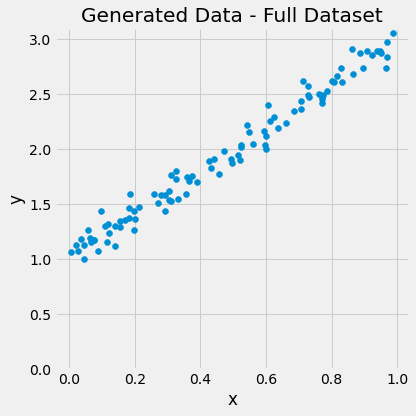

In [7]:
fig = figure1(x, y)

### Data Preparation V2

In [9]:
#Christina

torch.manual_seed(42)

# 1. Builds tensors from numpy arrays BEFORE split
x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()

dataset = TensorDataset(x_tensor,y_tensor)

# Performs the split
ratio = .8
n_total = len(dataset)
n_train = int(n_total*ratio)
n_val = n_total - n_train

train_data, val_data = random_split(dataset,[n_train,n_val])


train_loader = DataLoader(dataset=train_data,batch_size=16,shuffle=True)
val_loader = DataLoader(dataset=val_data,batch_size=16)

In [ ]:
# %load data_preparation/v2.py

torch.manual_seed(13)

# Builds tensors from numpy arrays BEFORE split
x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()

# Builds dataset containing ALL data points
dataset = TensorDataset(x_tensor, y_tensor)

# Performs the split
ratio = .8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

# Builds a loader of each set
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=16)

### Model Configuration V4

In [12]:
%%writefile model_configuration/v4.py

# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1))

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v4.py


In [14]:
%run -i model_configuration/v4.py

<Figure size 432x288 with 0 Axes>

In [15]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])


These are CPU tensors, since our model wasn’t sent anywhere (yet).
And now the fun begins: let’s put our StepByStep class to good use and train our
model.

## Model Training

### Cell 2.1.1

In [16]:
#Christina
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1))

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

In [19]:
#1.call calss
sbs = StepByStep(model, loss_fn, optimizer)
# Data
sbs.set_loaders(train_loader, val_loader)
sbs.set_tensorboard('classy')

In [20]:
print(sbs.model == model)
print(sbs.model)

True
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


### Cell 2.1.2

In [21]:
#including train and test, remember?
sbs.train(n_epochs=200)

In [22]:
print(model.state_dict()) # remember, model == sbs.model
print(sbs.total_epochs)

OrderedDict([('0.weight', tensor([[1.9584]])), ('0.bias', tensor([1.0099]))])
200


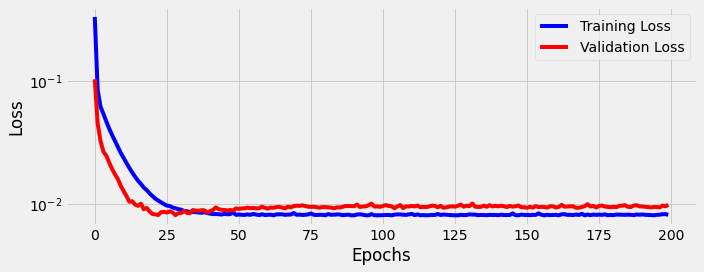

In [23]:
fig = sbs.plot_losses()

### Making Predictions

In [24]:
new_data = np.array([.5, .3, .7]).reshape(-1, 1)
new_data

array([[0.5],
       [0.3],
       [0.7]])

In [25]:
predictions = sbs.predict(new_data)
predictions

array([[1.9891285],
       [1.5974443],
       [2.3808126]], dtype=float32)

### Checkpointing

### Cell 2.1.3

In [28]:
sbs.save_checkpoint('model_checkpoint.pth')

### Resuming Training

In [ ]:
%run -i model_configuration/v4.py

In [ ]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')), ('0.bias', tensor([0.8300], device='cuda:0'))])


### Cell 2.1.4


#### Resuming Training
Remember, when we did this in Chapter 2, we had to set up the stage before actually loading the model, loading the data, and configuring the model. We still need to do this, but we are now using the latest version of model configuration:

In [30]:
new_sbs = StepByStep(model, loss_fn, optimizer)

### Cell 2.1.5

In [32]:
new_sbs.load_checkpoint('model_checkpoint.pth')
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9584]])), ('0.bias', tensor([1.0099]))])


### Cell 2.1.6


But we are still missing one thing… the data! First, we need to set the data
loader(s), and then we can train our model for another, say, 50 epochs.

In [33]:
new_sbs.set_loaders(train_loader, val_loader)
new_sbs.train(n_epochs=50)

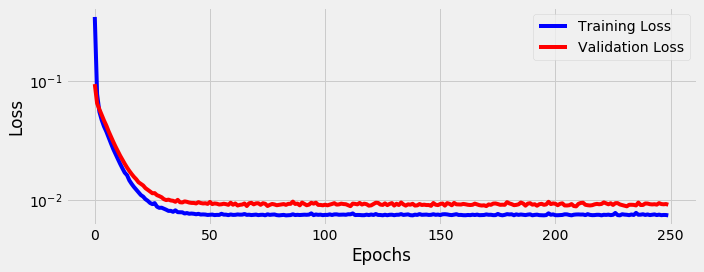

In [ ]:
fig = new_sbs.plot_losses()

In [34]:
#Christina
print(sbs.model.state_dict())

OrderedDict([('0.weight', tensor([[1.9599]])), ('0.bias', tensor([1.0143]))])


In [ ]:
print(sbs.model.state_dict())

OrderedDict([('0.weight', tensor([[1.9414]], device='cuda:0')), ('0.bias', tensor([1.0233], device='cuda:0'))])


# Putting It All Together

In [35]:
# %load data_preparation/v2.py

torch.manual_seed(13)

# Builds tensors from numpy arrays BEFORE split
x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()

# Builds dataset containing ALL data points
dataset = TensorDataset(x_tensor, y_tensor)

# Performs the split
ratio = .8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_data,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_data, batch_size=16)

In [36]:
# %load model_configuration/v4.py

# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model
model = nn.Sequential(nn.Linear(1, 1))

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

In [37]:
n_epochs = 200

sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(train_loader, val_loader)
sbs.set_tensorboard('classy')
sbs.train(n_epochs=n_epochs)

In [38]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9416]])), ('0.bias', tensor([1.0235]))])


# Recap
In this chapter, we’ve revisited and reimplemented many methods. This is what
we’ve covered:
- defining our StepByStep class
- understanding the purpose of the constructor `(__init__)` method
- defining the arguments of the constructor method
- defining class' attributes to store arguments, placeholders, and variables we need to keep track of
- defining functions as attributes, using higher-order functions and the class'
attributes to build functions that perform training and validation steps
- understanding the difference between public, protected, and private methods;
and Python’s "relaxed" approach to it
- creating methods to set data loaders and TensorBoard integration (re)implementing training methods: _mini_batch and train
- implementing saving and loading methods: save_checkpoint and load_checkpoint
- implementing a method for making predictions that takes care of all boilerplate code regarding Numpy to PyTorch conversion and back
- implementing methods to plot losses and add the model’s graph to TensorBoard
- instantiating our StepByStep class and running a classy pipeline: configuring the model, loading the data, training the model, making predictions checkpointing, and resuming training. The whole nine yards!